#   Practical session on Support Vector Machines (SVM)
( notebook initially created by Judith Abecassis (http://members.cbio.mines-paristech.fr/~jabecassi), Chloé Azencott (http://cazencott.info) and Benoit Playe (http://cbio.ensmp.fr/~bplaye), all 3 from the Center for Computational Biology of MINES ParisTech )

Pratical Session completed by Alexandra Baron.

<b>All this notebok is using the simple and very well-known <a href=http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html>"Iris" classification dataset</a>, which contains 150 examples (each with 4 numeric attributes) equally distributed in 3 classes.</b>


In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
# importer les données
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
# afficher la description de la base de données
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
# iris.feature_names[]
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### LINEAR SVM
We first restrict ourselves to two of the three classes: setosa et virginica, and  (for visualization purposes) to only 2 of the 4 features/attributes: sepal length and sepal width. We are going to train a linear SVM, and display the obtained separating hyperplane (a straight line, since we for the moment work in 2D input space). 

We will use the [SVC class](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) from the svm module of scikit-learn. **As usual, you should first browse the documentation (here of SVC class) in order to understand well how SVC works, and what are its hyper-parameters.**

In [4]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1000)

# select the data we want: (2 of the 3 classes, and 2 of the 4 features)
X = iris.data[iris.target!=1, :2]
print(X.shape)
y = iris.target[iris.target!=1]
print(y.shape)
clf.fit(X, y)

(100, 2)
(100,)


SVC(C=1000, kernel='linear')

#### Let's plot the separating hyperplane

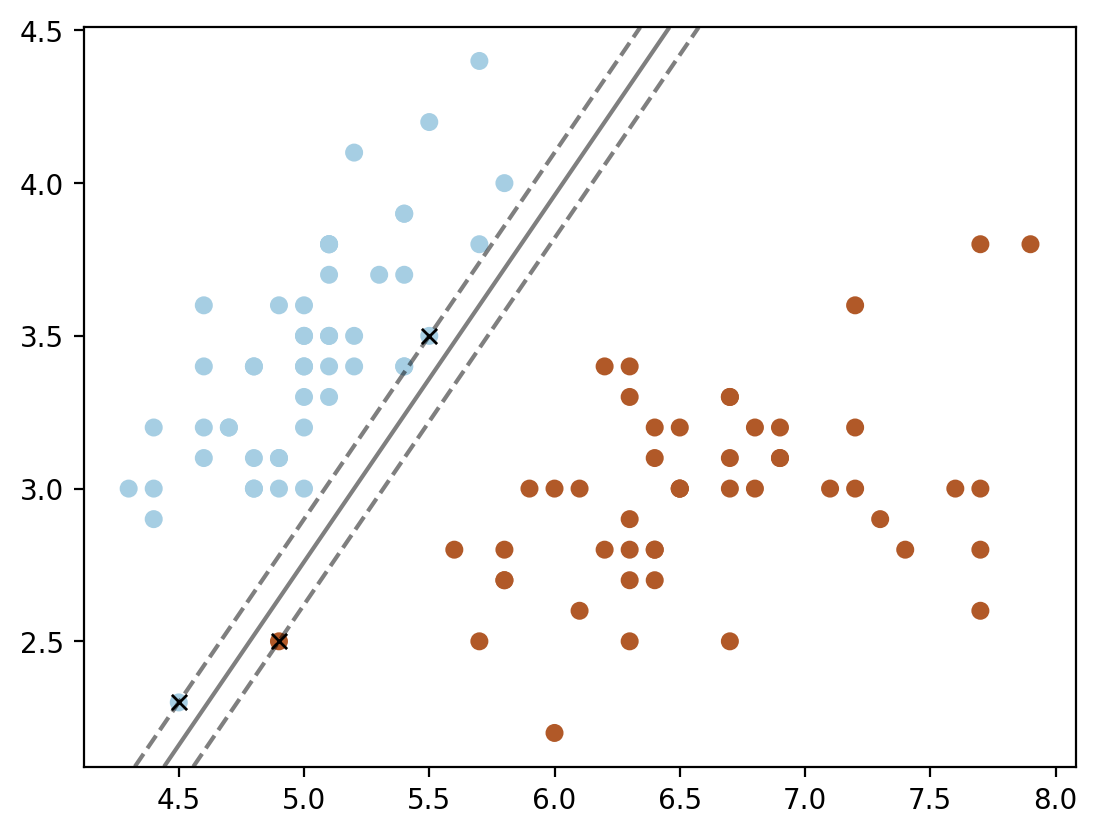

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
#ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
#           linewidth=1, facecolors='none')

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=30,
           linewidth=1, marker='x', color='k')

__Question:__ Where are located the support vectors?

__Answer:__ *The support vectors are located on or near the margin boundaries (the dashed lines at distance 1 from the decision boundary). They are the data points closest to the decision boundary that define the optimal separating hyperplane. In this linearly separable case (setosa vs virginica), the support vectors lie exactly on the margins.*

#### Let us evaluate the performance of the learnt predictor

In [6]:
print(clf.score(X, y))

1.0


__Question:__ What is the performance metric computed by `clf.score`? Please refer to the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.score). What is the meaning if the permormance value is equal to 1.0 ?

__Answer:__ *The `clf.score` method computes the mean accuracy of the classifier on the given data and labels. It returns the fraction of correctly classified samples.* 

*A performance value of 1.0 means that the classifier achieved 100% accuracy, i.e., all samples were correctly classified. In this case, the two classes (setosa and virginica) are perfectly linearly separable with the chosen features.*

Now, let us consider the *Versicolor* class (instead of Setosa), and still the Virginica class.

In [7]:
clf = svm.SVC(kernel='linear', C=1000)

# select the data we want: (2 of the 3 classes, and 2 of the 4 features)
X = iris.data[iris.target!=0, :2]
print(X.shape)
y = iris.target[iris.target!=0]
print(y.shape)
clf.fit(X, y)

(100, 2)
(100,)


SVC(C=1000, kernel='linear')

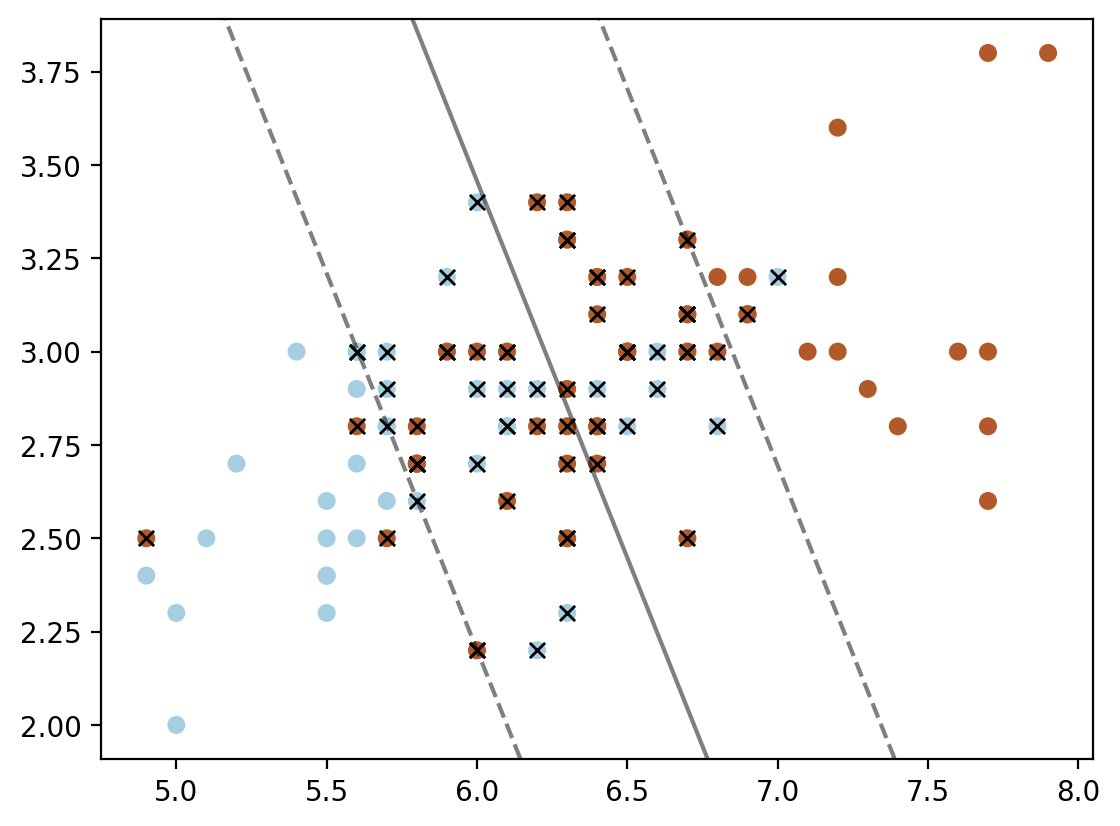

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
#ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
#           linewidth=1, facecolors='none')

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=30,
           linewidth=1, marker='x', color='k')

__Question:__ Where are located the support vectors?

__Answer:__ *In this case (versicolor vs virginica), since the classes are not perfectly linearly separable, some support vectors are within the margin and even on the wrong side of the decision boundary (misclassified points). These are the data points that are most difficult to classify and that define the best compromise hyperplane.*

Now, let us check the performance of the obtained linear SVM on this problem

In [9]:
print(clf.score(X, y))

0.73


The performance is not so good: only ~0.7. We should therefore try to use a NON-LINEAR kernel, in order to obtain a more complex separating boundary that could be better adapted to the data.

### SVM with NON-LINEAR kernel

We will use a Gaussian kernel (named 'rbf' in Scikit-Learn) SVC class, but should try different values for the gamma parameter. As seen during the lecture, the Gaussian kernel formula is:  
$k(x, x') = \frac{1}{\sqrt{2 \pi}} \exp\frac{-||x - x'||^2}{2 \sigma^2}$. 

__Question:__ What does the gamma parameter of Gaussian SVC (i.e. with 'rbf' kernel) correspond to (in equation above, and functionnally)?

__Answer:__ *The gamma parameter in scikit-learn's RBF kernel corresponds to gamma = 1/(2σ²) in the equation above.* 

*The RBF (Gaussian) kernel computes the similarity between X and Y as:*

*K(x, y) = exp(-gamma ||x-y||²)*

*for each pair of rows x in X and y in Y.*

*So functionally, γ (gamma) controls the "width" of the Gaussian kernel:*

*- **Small gamma** → large σ → wide kernel → smoother decision boundary (less sensitive to individual points, more generalization)*
*- **Large gamma** → small σ → narrow kernel → the decision boundary becomes very flexible and may overfit the training data (high sensitivity to individual points)*

*In summary, gamma controls the influence of a single training example: a high gamma value means that the influence of each training example is limited to a small region (more complex decision boundary), while a low gamma value means that the influence extends farther (smoother decision boundary).*

In [10]:
# Values to be tested for gamma
gamma_range = np.linspace(0.1, 50, 20)

for param in gamma_range:
    clf = svm.SVC(kernel='rbf', C=0.01, gamma=param)
    clf.fit(X, y)
    print("gamma: %.2f" % param, "score: %.2f" % clf.score(X, y))

gamma: 0.10 score: 0.68
gamma: 2.73 score: 0.73
gamma: 5.35 score: 0.69
gamma: 7.98 score: 0.70
gamma: 10.61 score: 0.71
gamma: 13.23 score: 0.76
gamma: 15.86 score: 0.76
gamma: 18.48 score: 0.76
gamma: 21.11 score: 0.76
gamma: 23.74 score: 0.78
gamma: 26.36 score: 0.78
gamma: 28.99 score: 0.78
gamma: 31.62 score: 0.78
gamma: 34.24 score: 0.79
gamma: 36.87 score: 0.80
gamma: 39.49 score: 0.80
gamma: 42.12 score: 0.80
gamma: 44.75 score: 0.80
gamma: 47.37 score: 0.80
gamma: 50.00 score: 0.80


__Question:__ Now display the separating boundary for the last of these classifiers, which has a score of ~0.8 (therefore a much better model than the linea SVM model).

In [ ]:
# Answer: [code to be inserted below]
# Train the classifier with the last gamma value (50.0)
clf = svm.SVC(kernel='rbf', C=0.01, gamma=50.0)
clf.fit(X, y)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=30,
           linewidth=1, marker='x', color='k')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(f'RBF SVM with gamma=50.0, score={clf.score(X, y):.2f}')

__Question:__ Which are the support vectors? Do you think the model shall generalize well (and why)?

__Answer:__ The support vectors are marked with 'x' symbols on the plot. With a very high gamma value (50.0), the decision boundary is highly non-linear and complex, creating small "islands" around individual or small groups of training points. This model likely does NOT generalize well because it is overfitting the training data: the decision boundary is too complex and adapts too closely to the training examples, including noise. The model will likely perform poorly on new, unseen data because it has memorized the training set rather than learning the underlying pattern.

In order to check if the model __generalizes__ well, we need to apply it on new data examples that have NOT been used for training the classifier. 

To this end, we will separate the data in two: a __training set__ and a __test set__. We will train our SVMs on only the training set, and measure the performance on only the test set. The test set, because it was not used during training, plays the role of future new data. For the splitting, we shall use the `train_test_split` function of scikit-learn, described [here](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=56)

acc_train, acc_test = list(), list()
for param in np.linspace(0.1, 50, 20):
    clf = svm.SVC(kernel='rbf', C=0.01, gamma=param)
    clf.fit(X_train, y_train)
    acc_train.append(clf.score(X_train, y_train))
    acc_test.append(clf.score(X_test, y_test))

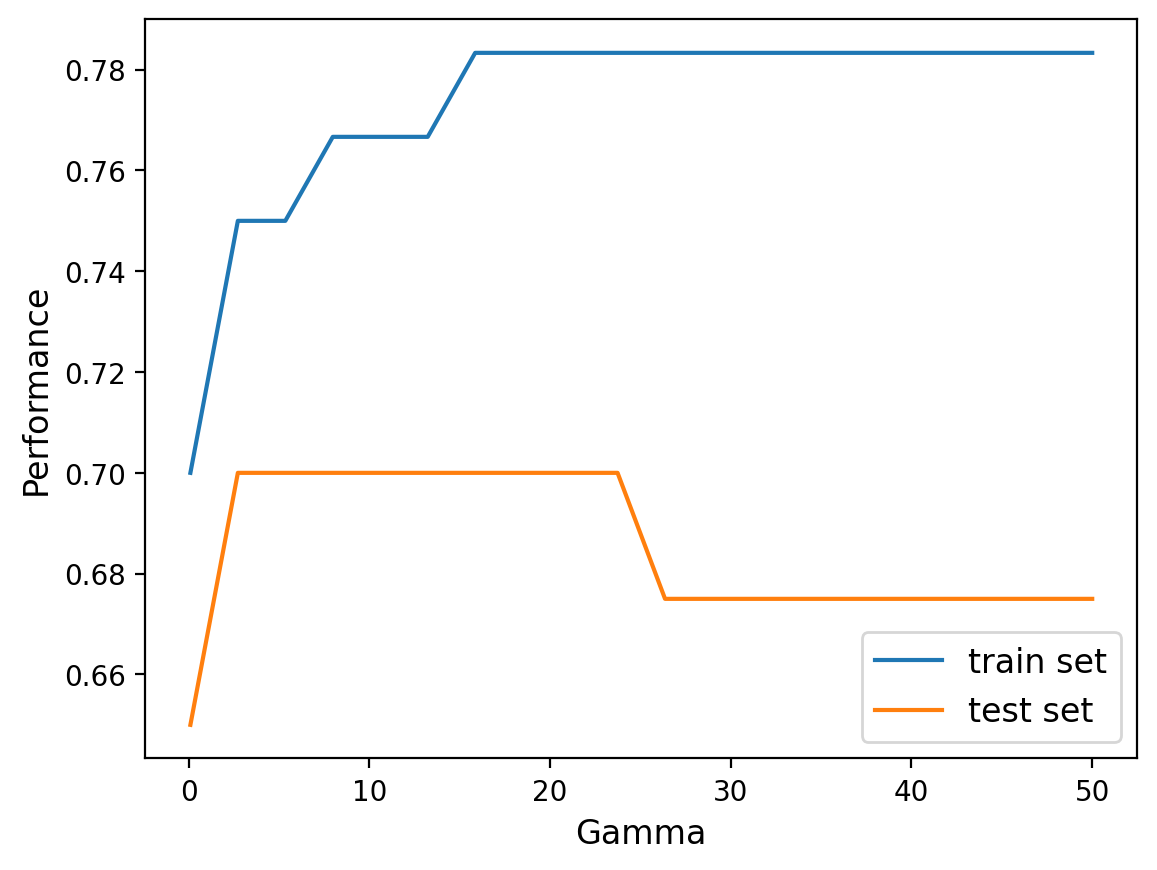

In [13]:
# Plot the traing AND test scores, for each value of gamma hyper-parameter
plt.plot(np.linspace(0.1, 50, 20), acc_train, label='train set')
plt.plot(np.linspace(0.1, 50, 20), acc_test, label='test set')

plt.xlabel("Gamma", fontsize=12)
plt.ylabel("Performance", fontsize=12)

plt.legend(loc='best', fontsize=12)

__Question:__ Do you observe OVER-FITTING? If yes, WHERE? 

__Answer:__ Yes, we observe clear overfitting when gamma values are high (approximately above 20-25). In this region, the training set performance continues to increase and remains high, while the test set performance starts to decrease or stagnates at a lower level. This gap between training and test performance is the signature of overfitting: the model fits the training data too well but fails to generalize to unseen data. The optimal gamma value appears to be around 10-15, where both training and test performances are reasonably good and close to each other.

Given the above graphic, we are tempted to choose a value of 10 or 20 for gamma. But BE CAREFULL! If we select the hyper-parameter value which works best on TEST set, it implies that we will have used information from the test set during training, so the performance estimation on test set might be over-estimated...

In order to avoid this, it is necessary to choose the best gamma value rather by __cross-validation__ applied to the TRAINING set. For this, we shall use the [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) class from the model_selection module of scikit-learn.

In [14]:
from sklearn.model_selection import GridSearchCV

# Define the parameters and values to be tested
parameters = {'kernel':('linear', 'rbf'), 
              'C':[0.1, 1, 10]}

# Initialize a SVM classifier
svc = svm.SVC()

# Initialize the cross-validation
clf = GridSearchCV(svc, parameters)

# Now, run cross-validation on the TRAINING set
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ('linear', 'rbf')})

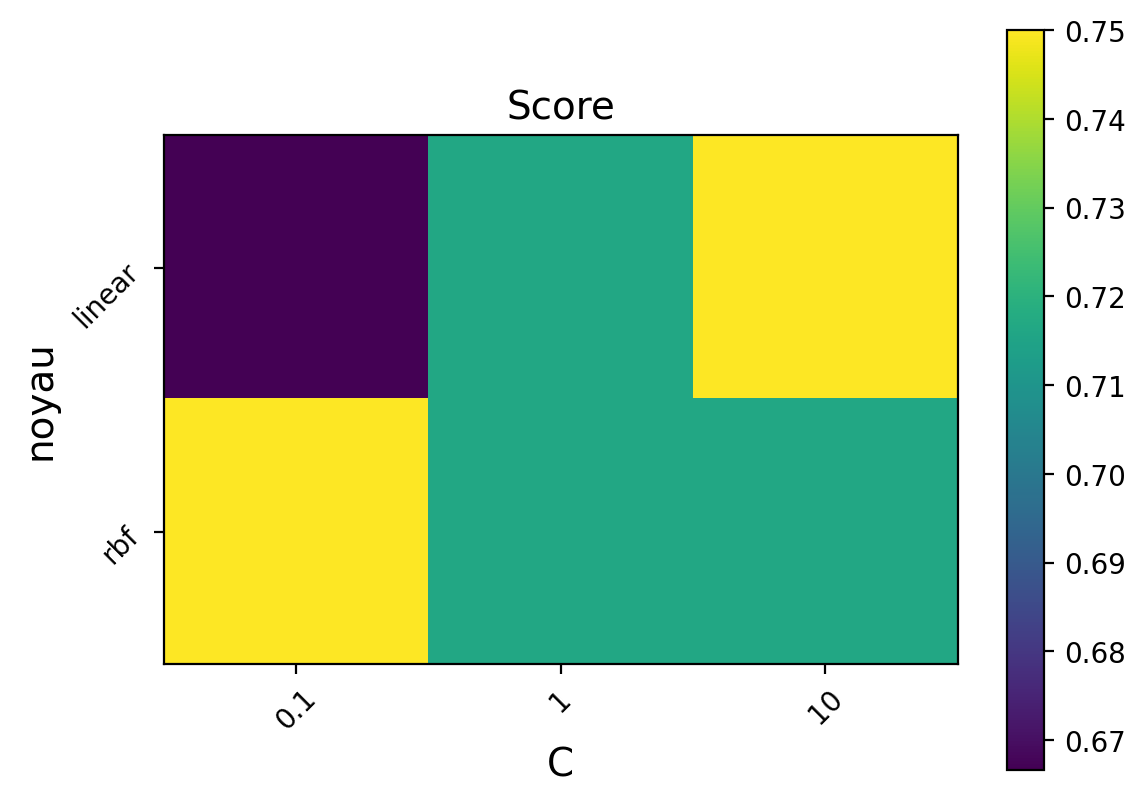

In [15]:
plt.imshow(clf.cv_results_['mean_test_score'].reshape(len(parameters['kernel']), 
                                                      len(parameters['C'])), interpolation='none')

plt.xlabel('C', fontsize=14)
plt.ylabel('noyau', fontsize=14)
plt.title("Score", fontsize=14)

plt.xticks(np.arange(len(parameters['C'])), parameters['C'], rotation=45)
plt.yticks(np.arange(len(parameters['kernel'])), parameters['kernel'], rotation=45)

plt.colorbar()

__Question:__ What is the role of the hyper-parameter C? What do you observ when C is large? 

__Answer:__ The hyper-parameter C controls the trade-off between maximizing the margin and minimizing the classification error on the training data. It is the regularization parameter: a small C creates a wider margin but allows more misclassifications (soft margin), while a large C aims to classify all training examples correctly, leading to a narrower margin and potentially more complex decision boundaries. When C is large, the model is more prone to overfitting because it tries harder to correctly classify every training point, even if it means creating a more complex boundary. From the heatmap, we observe that larger C values generally lead to better cross-validation scores, with C=10 performing best.

### Wrap-up: now, write below the codes for finding best SVM hyper-parameters, when using ALL 4 features/attributes:

__Question:__ Train, with CROSS-VALIDATION, a classification SVM to separate classes on the 2 different problems setosa_vs_virginica, then versicolor_vs_virginica. 

What performances obtain your optimal SVMs on the TEST set?

##### 1) Setosa vs virginica

In [ ]:
# Answer
# Select setosa (0) and virginica (2), using ALL 4 features
X = iris.data[iris.target != 1]
y = iris.target[iris.target != 1]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=56)

# Define parameters for grid search
parameters = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10]
}

# Initialize SVM and GridSearchCV
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5, verbose=1)

# Fit on training data
clf.fit(X_train, y_train)

# Print results
print("Best parameters found:", clf.best_params_)
print("Best cross-validation score:", clf.best_score_)
print("Test set score:", clf.score(X_test, y_test))

##### 2) Versicolour et Virginica

In [ ]:
# Answer
# Select versicolor (1) and virginica (2), using ALL 4 features
X = iris.data[iris.target != 0]
y = iris.target[iris.target != 0]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=56)

# Define parameters for grid search
parameters = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10]
}

# Initialize SVM and GridSearchCV
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5, verbose=1)

# Fit on training data
clf.fit(X_train, y_train)

# Print results
print("Best parameters found:", clf.best_params_)
print("Best cross-validation score:", clf.best_score_)
print("Test set score:", clf.score(X_test, y_test))

__Question: Look into SVC documentation, and explain how it handles MULTI-CLASS problems. *How many different SVMs does SVC learn and combine if there is a total of K classes*?__ 

__Answer:__ The SVC class in scikit-learn uses the "one-versus-one" (OVO) approach for multi-class classification. For K classes, it constructs K(K-1)/2 binary classifiers, where each classifier is trained to distinguish between each pair of classes. For example, with 3 classes, it trains 3×2/2 = 3 binary SVMs. During prediction, each binary classifier votes for one class, and the class with the most votes is selected as the final prediction. This approach is more robust than one-versus-rest for SVM because it doesn't suffer from class imbalance issues.


### Assignment #1:  1/ Find (using gridSearch) the best possible SVM (with any kernel type among linear, polynomial or Gaussian) for the COMPLETE dataset (all 3 classes). 2/ For the best SVM model found, compute and display the CONFUSION MATRIX + compute and plot the PRECISION-RECALL CURVES FOR EACH CLASS

NB: for the second question, SEARCH BY YOURSELF INTO THE SciKit-Learn documentation in order to find the corresponding pre-programmed functions.

In [ ]:
# Assignment #1: Complete dataset (all 3 classes)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.preprocessing import label_binarize

# Use ALL data with ALL 4 features
X = iris.data
y = iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define parameters for grid search
parameters = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'degree': [2, 3, 4]  # For polynomial kernel
}

# Initialize SVM and GridSearchCV
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5, verbose=1, n_jobs=-1)

# Fit on training data
print("Training model with GridSearchCV...")
clf.fit(X_train, y_train)

# Print results
print("\nBest parameters found:", clf.best_params_)
print("Best cross-validation score:", clf.best_score_)
print("Test set score:", clf.score(X_test, y_test))

# Get predictions on test set
y_pred = clf.predict(X_test)

# 1. CONFUSION MATRIX
print("\n" + "="*50)
print("CONFUSION MATRIX")
print("="*50)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Best SVM Model')
plt.show()

# 2. PRECISION-RECALL CURVES FOR EACH CLASS
print("\n" + "="*50)
print("PRECISION-RECALL CURVES")
print("="*50)

# For multi-class, we need to binarize the output and use decision_function or predict_proba
# Retrain the best model with probability=True for decision scores
best_clf = svm.SVC(**clf.best_params_, probability=True)
best_clf.fit(X_train, y_train)

# Get probability scores
y_scores = best_clf.predict_proba(X_test)

# Binarize the labels for multi-class precision-recall
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

# Plot precision-recall curve for each class
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, class_name in enumerate(iris.target_names):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_scores[:, i])
    
    axes[i].plot(recall, precision, linewidth=2)
    axes[i].set_xlabel('Recall', fontsize=12)
    axes[i].set_ylabel('Precision', fontsize=12)
    axes[i].set_title(f'Precision-Recall Curve: {class_name}', fontsize=12)
    axes[i].grid(True, alpha=0.3)
    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0.0, 1.05])

plt.tight_layout()
plt.show()

print("\nAssignment #1 completed!")


# Final assignment on SVM 

**Now, use SVM to learn digit recognition on the [*Digits dataset*](http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html#sphx-glr-auto-examples-datasets-plot-digits-last-image-py)" (the same that was used at the end of the MLP practical session)**